# main.ipynb


In [101]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV as LogReg
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import pandas as pd

In [116]:
# Load the data

labelled_data = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')
labelled_data.rename(columns={'Unnamed: 0': 'label'}, inplace=True)

vocabulary = list(labelled_data.columns.values)

labelled_data.head()



,label,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# Unify classes to just the body of text and not the individual chapters to allow for a more general classification
# and this will make train-test split work

# Split the string at '_' and keep the first part
labelled_data['label'] = labelled_data['label'].str.split('_').str[0]

labelled_data.head(20)


,label,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Buddhism,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# unlabelled_data = pd.read_csv('AllBooks_baseline_DTM_Unlabelled.csv')
unlabelled_data = pd.read_csv('AllBooks_baseline_DTM_Unlabelled_duplicate.csv')
labelled_data.rename(columns={'# foolishness': 'foolishness'}, inplace=True)

unlabelled_data.head()


,# foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# The below is for using the already vectorized BoW (bag of words) data
# and doing a TF-IDF transform on it and then feeding it into the model

from sklearn.preprocessing import LabelEncoder

# Assuming 'labelled_data' is your original dataframe
# 'labels' column is the one with text labels like "Buddhism_Ch1"

# Step 1: Separate labels from features
labels = labelled_data['label'].values  # This creates a separate array of labels
labelled_data = labelled_data.drop('label', axis=1)  # This drops the label column from the dataframe

# Step 2: Encode labels if necessary
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # This encodes text labels to numbers

# Finally, view output
labelled_data

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
labelled_data.dtypes

foolishness    int64
hath           int64
wholesome      int64
takest         int64
feelings       int64
               ...  
visual         int64
thoughts       int64
illumines      int64
attire         int64
explains       int64
Length: 8266, dtype: object

In [121]:
X_train = labelled_data
y_train = encoded_labels
y_train

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [122]:
from sklearn.model_selection import train_test_split

# Train test split problem solved now with like unifying the classes

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    labelled_data, encoded_labels, test_size=0.5, random_state=42  # For example, 20% data as test
)

# # encoded_labels.dtype

In [123]:
X_train = labelled_data
y_train = encoded_labels
y_train

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [124]:
# encode

In [125]:
# Checking output of train test split
X_train


,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X_test
# X_test.dtypes

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
522,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
y_train

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [128]:
y_test


array([0, 6, 1, 7, 6, 5, 7, 6, 0, 6, 0, 5, 7, 6, 7, 6, 6, 3, 2, 6, 6, 6,
       4, 0, 6, 5, 5, 3, 6, 4, 7, 6, 3, 6, 5, 7, 6, 6, 0, 0, 6, 6, 6, 4,
       7, 0, 4, 2, 7, 6, 6, 0, 5, 7, 6, 7, 5, 5, 7, 7, 5, 0, 7, 4, 5, 6,
       7, 7, 3, 4, 7, 6, 0, 5, 7, 2, 5, 5, 6, 6, 6, 4, 3, 5, 7, 3, 5, 7,
       5, 6, 6, 0, 7, 6, 5, 6, 6, 6, 0, 4, 6, 7, 7, 7, 3, 7, 5, 6, 6, 1,
       7, 7, 5, 0, 5, 7, 7, 7, 6, 6, 5, 7, 6, 7, 6, 6, 6, 7, 5, 5, 6, 5,
       4, 0, 6, 5, 2, 5, 7, 7, 4, 4, 3, 7, 7, 7, 7, 6, 4, 0, 5, 5, 6, 0,
       4, 6, 7, 6, 6, 6, 0, 7, 7, 2, 3, 7, 5, 0, 5, 5, 7, 5, 7, 3, 7, 7,
       7, 7, 7, 7, 6, 7, 5, 7, 2, 6, 6, 6, 6, 6, 5, 7, 7, 6, 7, 7, 7, 6,
       6, 7, 7, 0, 7, 5, 6, 6, 7, 4, 1, 4, 6, 7, 5, 2, 2, 7, 0, 7, 5, 2,
       4, 7, 6, 7, 7, 4, 7, 3, 7, 6, 7, 7, 6, 5, 7, 7, 7, 6, 4, 5, 4, 6,
       7, 7, 5, 7, 6, 7, 4, 4, 7, 5, 7, 3, 7, 6, 0, 6, 7, 1, 6, 5, 6, 7,
       7, 7, 4, 4, 7, 7, 7, 4, 5, 0, 7, 4, 0, 7, 7, 6, 4, 6, 5, 6, 4, 6,
       6, 0, 6, 0, 7, 6, 2, 0, 2])

In [83]:
# Trying to skip the CountVectorizer step and directly feed the data into the TfidfTransformer
# since the spreadsheet already has the word counts, so
# effectively the spreadsheet is already the output of the CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix

# Ensure the data is all numeric / float
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

X_train_sparse = csr_matrix(X_train.values)

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train)


X_test_tfidf = tfidf_transformer.transform(X_test)

# X_train_tfidf.dtypes

In [84]:
# X_train_tfidf.head()

X_train

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.naive_bayes import MultinomialNB
# Other classifiers for potential future use to swap in and out
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'X' is your frequency matrix and 'y' is your target array
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test_tfidf, y_test))  # Evaluating the model


Model accuracy: 0.9745762711864406


/Users/emily.perez-rodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [86]:
# Ensure unlabelled_data has correct data types (float) and correct any label issues.
unlabelled_data = unlabelled_data.astype(np.float64)

unlabelled_data_sparse = csr_matrix(unlabelled_data.values)

# Apply the same TF-IDF transformation on unlabelled data

# Not sure if True or False below in use_idf is correct
transformer = TfidfTransformer(use_idf=False)
unlabelled_data_tfidf = transformer.transform(X=unlabelled_data_sparse)

# Predict using the trained model
unlabelled_predictions = model.predict(unlabelled_data_tfidf)

# Optionally, you can transform the numerical predictions back to label names using the inverse transform of LabelEncoder
predicted_labels = label_encoder.inverse_transform(unlabelled_predictions)


/Users/emily.perez-rodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [87]:
predicted_labels

# I wonder if the below is right? Wondering why it is all in order

array(['Buddhism_Ch1', 'Buddhism_Ch3', 'Buddhism_Ch4', 'Buddhism_Ch5',
       'Buddhism_Ch5', 'Buddhism_Ch6', 'Buddhism_Ch7', 'Buddhism_Ch8',
       'Buddhism_Ch9', 'Buddhism_Ch10', 'Buddhism_Ch11', 'Buddhism_Ch12',
       'Buddhism_Ch21', 'BookOfEccleasiasticus_Ch1', 'Buddhism_Ch15',
       'Buddhism_Ch16', 'Buddhism_Ch17', 'Buddhism_Ch18', 'Buddhism_Ch19',
       'Buddhism_Ch20', 'Buddhism_Ch21', 'Buddhism_Ch22', 'Buddhism_Ch23',
       'Buddhism_Ch24', 'Buddhism_Ch25', 'Buddhism_Ch26', 'Buddhism_Ch27',
       'Buddhism_Ch28', 'Buddhism_Ch29', 'Buddhism_Ch30', 'Buddhism_Ch31',
       'Buddhism_Ch32', 'Buddhism_Ch33', 'Buddhism_Ch34', 'Buddhism_Ch35',
       'Buddhism_Ch36', 'Buddhism_Ch37', 'Buddhism_Ch38', 'Buddhism_Ch39',
       'Buddhism_Ch40', 'Buddhism_Ch41', 'Buddhism_Ch42', 'Buddhism_Ch43',
       'Buddhism_Ch44', 'Buddhism_Ch45', 'Buddhism_Ch46',
       'TaoTeChing_Ch1', 'TaoTeChing_Ch2', 'TaoTeChing_Ch3',
       'TaoTeChing_Ch4', 'TaoTeChing_Ch5', 'TaoTeChing_Ch6',
       'T

Notes on Presentation:
-Data
-Features
-Models
-Optimize parameters of models
-results
-validation
-comparison and conclusion of models
-contributions

In [88]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
print(clf.predict(X[2:3]))


[3]


Confusion matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


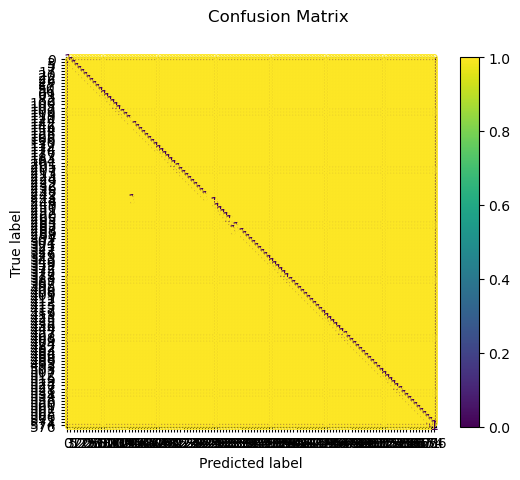

In [102]:
## WORK IN PROGRESS ##

from sklearn import metrics
# Visualize performance using confusion matrices to get summary of
#predictions made by classifier compared to the actual labels.
# code from week 6 - class 2
#predict_train = model.predict(X_train) #train the model with training data
predict_test = model.predict(X_test) #test the model on the testing data

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#off-diagonal elements represent misclassifications
#why is it only 0s and 1s when there are more classes than just 2?

In [121]:
# use ROC curve to visualize tradeoff between true positive and false positive rates
# for a good model we want to see it hug the upper left corner
#code from week 5 lecture 2

# not working
"""
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr,_ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
"""
#metrics.plot_roc_curve(model, X_test, y_test)

"\ny_pred_proba = model.predict_proba(X_test)[::,1]\nfpr, tpr,_ = roc_curve(y_test, y_pred_proba)\nplt.plot(fpr,tpr)\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.show()\n"

In [122]:
# code from week 5- lecture 4 to get TPR, FPR, TNR, FNR
#why is this not giving the 4 value matrix with TPR, FPR, TNR, and FNR??
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_tfidf) # which should I use X_test or X_test_tfidf?
print(confusion_matrix(y_test, y_pred)) #replace with y, y_pred?


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


/Users/emily.perez-rodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
